# Time Series Week 7 - Assignment

## 1. Import Module and Load Data

### 1.1. Import Necessary Libraries
**Task:** Import the necessary libraries for time series analysis, including pmdarima for ARIMA modeling.

In [108]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
import os
import numpy as np

import pandas as pd
import pandas_datareader.data as pdr

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib
plt.style.use("seaborn-whitegrid")

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import seaborn as sns

plt.style.use('seaborn-whitegrid')
#sns.set_style("white")
%matplotlib inline

import itertools

import warnings
from statsmodels.tools.sm_exceptions import ValueWarning
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Suppress specific warnings
warnings.simplefilter(action='ignore', category=ValueWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

<ipython-input-109-7ec5cdd2bd99>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")
<ipython-input-109-7ec5cdd2bd99>:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


### 1.2. Load Data
**Task:** Load a time series dataset (e.g., monthly or daily sales, stock prices, or temperature data)

In [110]:
# Load the data using pandas and visualize the first few rows
df = pd.read_csv('/content/drive/Shareddrives/timeseries-datasets/sales_dataset.csv')
df['Dates'] = pd.to_datetime(df['Dates'])  # 날짜 형식으로 변환

print(df.columns)
print(df.info())

df.set_index('Dates', inplace=True)  # 'Dates' 열을 인덱스로 설정

df.head()

# Use only the 'Sales' column for the ACF plot



Index(['Dates', 'Sales'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dates   200 non-null    datetime64[ns]
 1   Sales   200 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.2 KB
None


,Sales
Dates,
2008-05-31,54.97
2008-06-30,49.75
2008-07-31,58.74
2008-08-31,68.61
2008-09-30,52.16


## 2. ACF and PACF Plot
### 2.1. ACF Plot
**Task:** Plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) to explore the data's patterns and lags.

<Figure size 500x500 with 0 Axes>

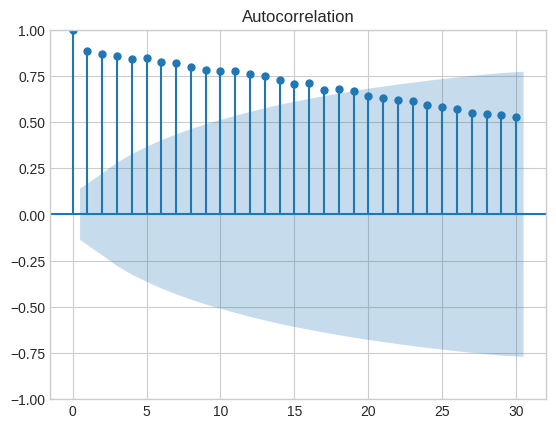

In [111]:
# ACF plot
plt.figure(figsize=(5, 5))
sm.graphics.tsa.plot_acf(df.values.squeeze(), lags=30)
plt.show()

<Figure size 500x500 with 0 Axes>

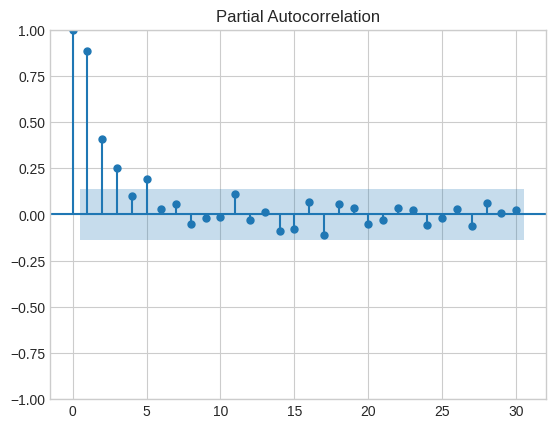

In [112]:
# PACF plot
plt.figure(figsize=(5, 5))
sm.graphics.tsa.plot_pacf(df.values.squeeze(), lags=30)
plt.show()

## 3. Analyze Non-Stationary Time Series Data
### 3.1. Visualize Time Series, Moving Average, and Moving Standard Deviation
**Task:** Plot the original time series along with the moving average and moving standard deviation.

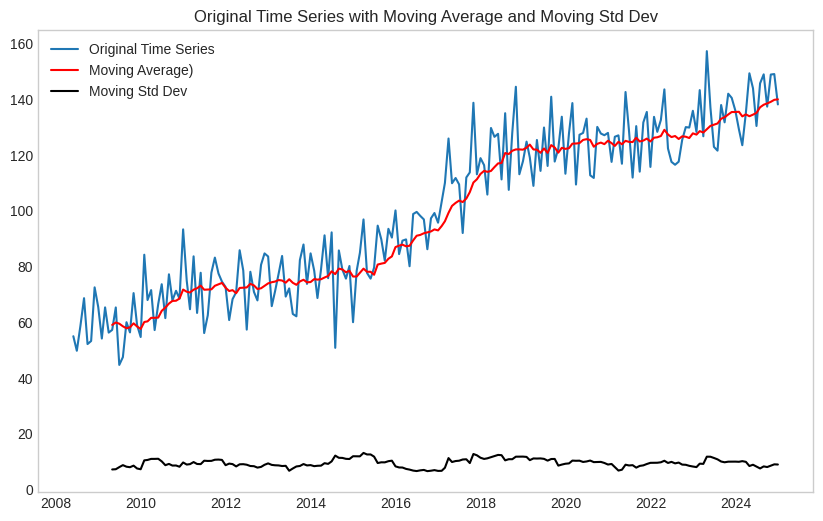

In [113]:
# Calculate and plot the moving average and moving standard deviation over a window (e.g., 12 months or days)


# Function to visualize rolling statistics all in one graph
def plot_rolling_statistics_combined(timeseries, window=12):
    # Calculate rolling mean and standard deviation
    rolmean = timeseries.rolling(window=window).mean()  # Moving-Average time-series
    rolstd = timeseries.rolling(window=window).std()    # Moving-Std time-series

    # Create a single figure for all plots together
    plt.figure(figsize=(10, 6))

    # Plot Original Time Series
    plt.plot(timeseries, label='Original Time Series')

    # Plot Rolling Mean
    plt.plot(rolmean, color='red', label=f'Moving Average)')

    # Plot Rolling Standard Deviation
    plt.plot(rolstd, color='black', label=f'Moving Std Dev')

    # Add title and legend
    plt.title('Original Time Series with Moving Average and Moving Std Dev')
    plt.legend()
    plt.grid(False)

    # Display the combined plot
    plt.show()

# Apply the function to your time series data
plot_rolling_statistics_combined(df['Sales'], window=12)

## 4. Augmented Dickey-Fuller (ADF) Test for Stationarity
### 4.1. Perform ADF Test
**Task:** Perform the ADF test to check for stationarity in the original data.


In [114]:
# Use the adfuller function from statsmodels to perform the test and print the results (test statistic, p-value, and critical values)

from statsmodels.tsa.stattools import adfuller


def adf_test(timeseries):
    # ADF 테스트 실행
    adf_result = adfuller(timeseries, autolag='AIC')

    # 결과 출력
    print("ADF Statistic: {:.4f}".format(adf_result[0]))
    print("P-Value: {:.4f}".format(adf_result[1]))
    print("======================")
    print("Critical Values:")
    for key, value in adf_result[4].items():
        print(f"   {key}: {value:.4f}")

# 시계열 데이터에서 ADF 테스트 실행
# 여기서는 df['Sales']를 예시로 사용 (자신의 데이터에 맞게 수정)
adf_test(df['Sales'])

ADF Statistic: -0.3214
P-Value: 0.9224
Critical Values:
   1%: -3.4647
   5%: -2.8766
   10%: -2.5748


## 5. Data Processing for Stationarity


### 5.1. Log Transformation
**Task:** Apply a log transformation to stabilize the variance and check for stationarity using the ADF test.

In [115]:
# Use np.log to apply the log transformation and re-run the ADF test to check for stationarity

df_log = np.log(df)
adf_test(df_log)


ADF Statistic: -0.8666
P-Value: 0.7988
Critical Values:
   1%: -3.4654
   5%: -2.8770
   10%: -2.5750


### 5.2. Differencing to Offset Seasonality
**Task:** Apply differencing to remove seasonality and check for stationarity again using the ADF test.

In [116]:
# Perform first-order differencing and check stationarity
# differencing 한 후에 ADF 테스트 결과 출력 - > 위에 함수 써도 똑같긴 한데 그냥 새로 만듬

def adf_test_diff(timeseries):
    # 로그 변환
    log_timeseries = np.log(timeseries)

    # 로그 변환된 시계열의 차분
    log_timeseries_shift = log_timeseries.shift()
    timeseries_log_diff = log_timeseries - log_timeseries_shift

    diff_timeseries = timeseries_log_diff.dropna()
    adf_result = adfuller(diff_timeseries)

    print("Value of n: 1")
    print("ADF Statistic (Differenced): {:.4f}".format(adf_result[0]))
    print("P-Value (Differenced): {:.4f}".format(adf_result[1]))
    print("Critical Values:")
    for key, value in adf_result[4].items():
        print(f"   {key}: {value:.4f}")

# 함수 실행
adf_test_diff(df['Sales'])





Value of n: 1
ADF Statistic (Differenced): -7.3002
P-Value (Differenced): 0.0000
Critical Values:
   1%: -3.4654
   5%: -2.8770
   10%: -2.5750


## 6. Split Data into Train and Test Sets
### 6.1. Split Data
**Task:** Split the dataset into training and testing sets for model validation.

In [118]:
# Split the data into train (80%) and test (20%) sets based on time
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)
# Display the length of both train and test sets
print(f"Train size: {len(train_data)}")
print(f"Test size: {len(test_data)}")



Train size: 160
Test size: 40


In [119]:
# Apply logarithm on the training set and display the first 5 rows
train_data_log = np.log(train_data)
train_data_log.head()

,Sales
Dates,
2008-05-31,4.006788
2008-06-30,3.907010
2008-07-31,4.073121
2008-08-31,4.228438
2008-09-30,3.954316


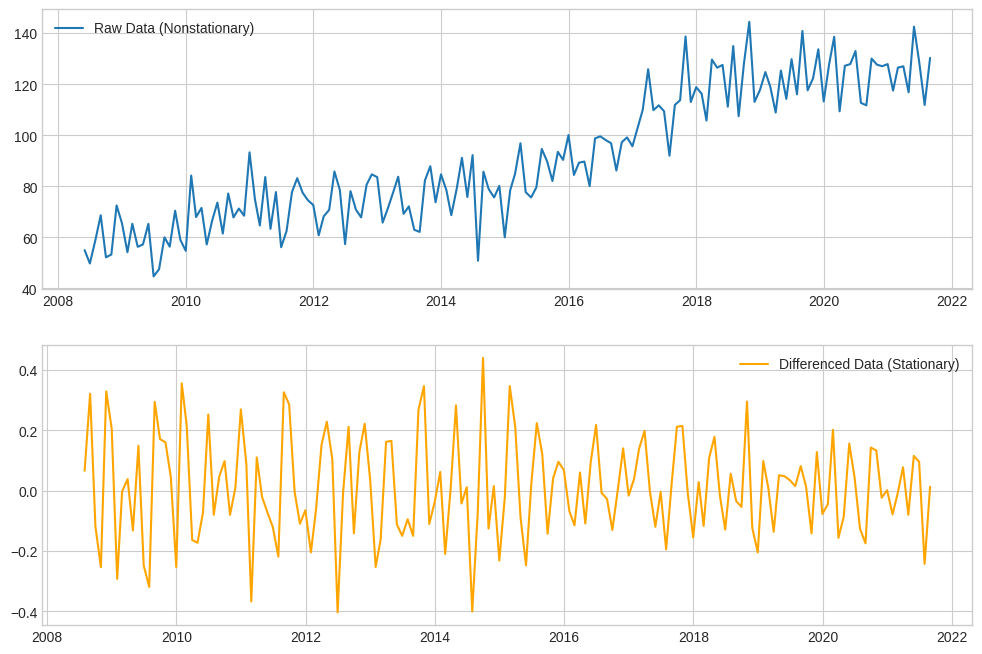

In [120]:
diff_log_train_data = train_data_log - np.log(train_data.shift(2))
diff_log_train_data = diff_log_train_data.dropna()


# Differenced data plot
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(train_data)
plt.legend(['Raw Data (Nonstationary)'])
plt.subplot(212)
plt.plot(diff_log_train_data, 'orange') # first difference (t - (t-1))
plt.legend(['Differenced Data (Stationary)'])
plt.show()

## 7. Train ARIMA Model
### 7.1 Define Parameters p, d, q
**Task:** Define the parameter ranges for ARIMA (p, d, q) and use AIC (Akaike Information Criterion) to find the optimal parameters.

In [121]:
# Define the p, d, and q parameters
p = range(0,3)
d = range(1,2)
q = range(0,3)
# Generate all different combinations of p, d, q triplets
pdq = list(itertools.product(p, d, q))
# Initialize a dataframe to store the results
results = []
# Grid search to find the optimal parameters
for param in pdq:
    try:
        temp_model = ARIMA(train_data_log, order=param)
        temp_result = temp_model.fit()
        results.append([param, temp_result.aic])
    except:
        continue
# Convert the results into a dataframe
results_df = pd.DataFrame(results, columns=['parameters', 'AIC'])
# Sort the results by AIC
results_df = results_df.sort_values(by='AIC').reset_index(drop=True)
# Get the best parameters and corresponding AIC score
print(results_df)
# Print the optimal parameters and their AIC score
optimal_parameters = results_df.iloc[0]['parameters']
optimal_aic = results_df.iloc[0]['AIC']

# 결과 출력
print(f"The optimal parameters are {optimal_parameters} with an AIC score of {optimal_aic:.2f}")

  parameters         AIC
0  (2, 1, 2) -207.202695
1  (0, 1, 1) -206.855227
2  (0, 1, 2) -205.966437
3  (1, 1, 2) -205.722297
4  (1, 1, 1) -205.703467
5  (2, 1, 1) -205.348484
6  (2, 1, 0) -183.148442
7  (1, 1, 0) -162.786077
8  (0, 1, 0) -120.789824
The optimal parameters are (2, 1, 2) with an AIC score of -207.20


In [122]:
optimal_ARIMA = ARIMA(train_data_log, order = (2,1,2))
optimal_ARIMA_fit = optimal_ARIMA.fit()
print(optimal_ARIMA_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  160
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 108.601
Date:                Fri, 18 Oct 2024   AIC                           -207.203
Time:                        08:48:41   BIC                           -191.858
Sample:                    05-31-2008   HQIC                          -200.971
                         - 08-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9568      0.142     -6.754      0.000      -1.234      -0.679
ar.L2         -0.1743      0.100     -1.740      0.082      -0.371       0.022
ma.L1          0.1162      0.113      1.026      0.3

## 7.2 Model Prediction and Visualization
**Task:** Use the ARIMA model to forecast and visualize the predictions.

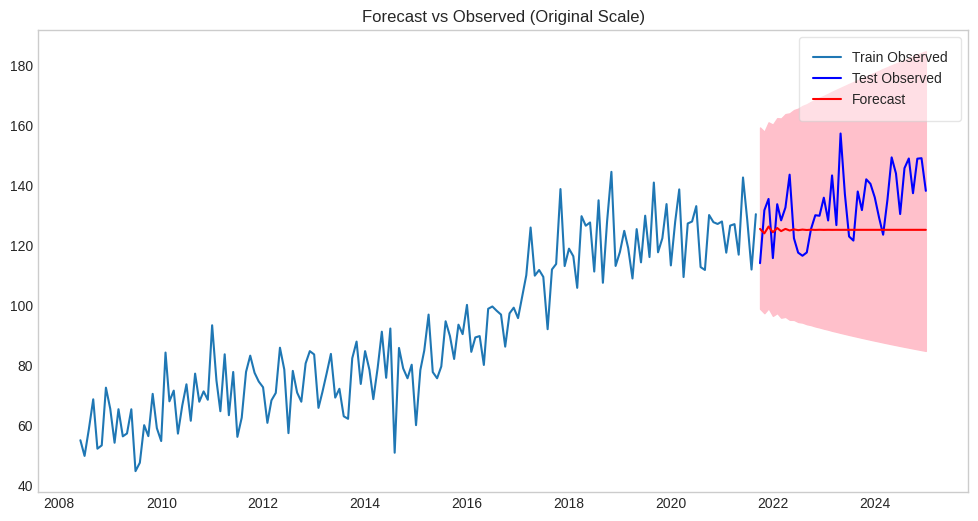

In [123]:
# Perform predictions on the test data
forecast_steps_test = len(np.log(test_data))
forecast_result_test = optimal_ARIMA_fit.get_forecast(steps=forecast_steps_test)
forecast_test = forecast_result_test.predicted_mean
confidence_intervals_test = forecast_result_test.conf_int()

# Set the index for the forecast
forecast_test.index = test_data.index
confidence_intervals_test.index = test_data.index

# Convert forecast results back to the original scale
forecast_test_original_scale = np.exp(forecast_test)
confidence_intervals_test_original_scale = np.exp(confidence_intervals_test.apply(pd.to_numeric))


# Visualize the forecast results on the original scale
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train Observed')
plt.plot(test_data, label='Test Observed', color='blue')
plt.plot(forecast_test_original_scale, label='Forecast', color='red')
plt.fill_between(confidence_intervals_test_original_scale.index,
                 confidence_intervals_test_original_scale.iloc[:, 0],
                 confidence_intervals_test_original_scale.iloc[:, 1], color='pink')
plt.title('Forecast vs Observed (Original Scale)')
plt.legend(frameon=True, fancybox=True, framealpha=0.5, borderpad=1)
plt.grid(False)

plt.show()

## 8. Train SARIMA Model

### 8.1. Build SARIMA Model
**Task:** Extend the ARIMA model to include seasonality (SARIMA).

In [124]:
# Define the p, d, q parameters for non-seasonal part
p = range(0, 3)
d = range(1, 3)
q = range(0, 3)

pdq = list(itertools.product(p, d, q))
# Define the P, D, Q, m parameters for seasonal part (seasonal component)
P = range(0, 2)
D = range(0, 2)
Q = range(0, 2)
m = [12]

seasonal_pdq = list(itertools.product(P, D, Q, m))
results = []

# Grid search over non-seasonal (p, d, q) and seasonal (P, D, Q, m) parameters
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            temp_model = SARIMAX(train_data_log,
                                 order=param,
                                 seasonal_order=seasonal_param,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
            temp_result = temp_model.fit()
            results.append([param, seasonal_param, temp_result.aic])
        except Exception as e:
            continue


# Convert the results into a dataframe
results_df = pd.DataFrame(results, columns=['Non-seasonal parameters', 'Seasonal parameters', 'AIC'])

# Sort the results by AIC (lower AIC means a better fit)
results_df = results_df.sort_values(by='AIC').reset_index(drop=True)

# Print the results
print(results_df)

optimal_Ns_parameters = results_df.iloc[0]['Non-seasonal parameters']
optimal_S_parameters = results_df.iloc[0]['Seasonal parameters']

optimal_aic = results_df.iloc[0]['AIC']

# 결과 출력
print(f"The optimal parameters are {optimal_Ns_parameters}x{optimal_S_parameters}with an AIC score of {optimal_aic:.2f}")

    Non-seasonal parameters Seasonal parameters         AIC
0                 (2, 1, 2)       (0, 0, 0, 12) -204.631371
1                 (0, 1, 1)       (0, 0, 0, 12) -203.938518
2                 (0, 2, 2)       (0, 0, 0, 12) -203.658781
3                 (2, 1, 1)       (0, 0, 0, 12) -203.518940
4                 (1, 1, 2)       (0, 0, 1, 12) -203.315437
..                      ...                 ...         ...
139               (0, 2, 0)       (0, 1, 1, 12)   59.385887
140               (0, 2, 0)       (1, 1, 1, 12)   71.239648
141               (1, 2, 0)       (0, 1, 0, 12)   78.513882
142               (0, 2, 0)       (1, 1, 0, 12)  113.244183
143               (0, 2, 0)       (0, 1, 0, 12)  158.424432

[144 rows x 3 columns]
The optimal parameters are (2, 1, 2)x(0, 0, 0, 12)with an AIC score of -204.63


In [125]:
# Define the SARIMA model
# order = (p, d, q) for non-seasonal part
# seasonal_order = (P, D, Q, m) for seasonal part, where m is the number of periods in a season
optimal_SARIMA = SARIMAX(train_data_log,
                         order=(2, 1, 2),           # Non-seasonal ARIMA parameters (p, d, q)
                         seasonal_order=(0, 0, 0, 12),  # Seasonal ARIMA parameters (P, D, Q, m)
                         enforce_stationarity=False,  # Relax stationarity assumption if needed
                         enforce_invertibility=False)  # Relax invertibility assumption if needed

# Fit the SARIMA model
optimal_SARIMA_fit = optimal_SARIMA.fit()

# Print the summary of the fitted model
print(optimal_SARIMA_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  160
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 107.316
Date:                Fri, 18 Oct 2024   AIC                           -204.631
Time:                        08:49:47   BIC                           -189.382
Sample:                    05-31-2008   HQIC                          -198.438
                         - 08-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9601      0.143     -6.725      0.000      -1.240      -0.680
ar.L2         -0.1906      0.099     -1.929      0.054      -0.384       0.003
ma.L1          0.1070      0.117      0.912      0.3

## 8.2 Model Prediction and Visualization
**Task:** Use the SARIMA model to forecast and visualize the predictions.

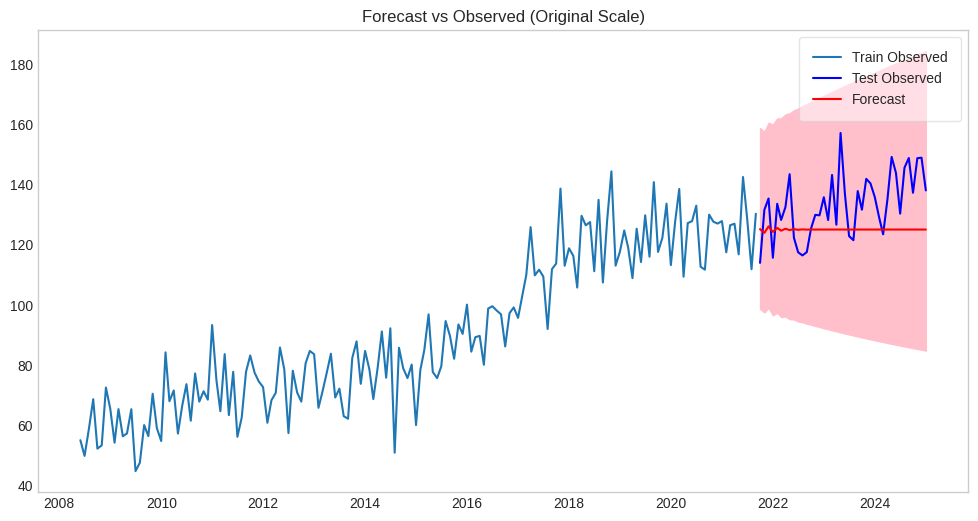

In [126]:
# Perform predictions on the test data
forecast_steps_test = len(np.log(test_data))
forecast_result_test = optimal_SARIMA_fit.get_forecast(steps=forecast_steps_test)
forecast_test = forecast_result_test.predicted_mean
confidence_intervals_test = forecast_result_test.conf_int()

# Set the index for the forecast
forecast_test.index = test_data.index
confidence_intervals_test.index = test_data.index

# Convert forecast results back to the original scale
forecast_test_original_scale = np.exp(forecast_test)
confidence_intervals_test_original_scale = np.exp(confidence_intervals_test.apply(pd.to_numeric))

# Visualize the forecast results on the original scale
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train Observed')
plt.plot(test_data, label='Test Observed', color='blue')
plt.plot(forecast_test_original_scale, label='Forecast', color='red')
plt.fill_between(confidence_intervals_test_original_scale.index,
                 confidence_intervals_test_original_scale.iloc[:, 0],
                 confidence_intervals_test_original_scale.iloc[:, 1], color='pink')
plt.title('Forecast vs Observed (Original Scale)')


plt.legend(frameon=True, fancybox=True, framealpha=0.5, borderpad=1)
plt.grid(False)

plt.show()

## Extra Credit Question
Why does the ARIMA and SARIMA produce the same result?

In [127]:
Answer = """Although both ARIMA (Autoregressive Integrated Moving Average) and SARIMA (Seasonal ARIMA)
are fundamentally based on the ARIMA model, SARIMA is an extended version that accounts for seasonality.
The reason why both models can produce the same result is if there is no clear seasonality in the data.
While SARIMA includes a seasonal component, if the data does not exhibit a seasonal pattern,
the SARIMA model will produce the same result as the ARIMA model."""
print(Answer)

Although both ARIMA (Autoregressive Integrated Moving Average) and SARIMA (Seasonal ARIMA) 
are fundamentally based on the ARIMA model, SARIMA is an extended version that accounts for seasonality. 
The reason why both models can produce the same result is if there is no clear seasonality in the data. 
While SARIMA includes a seasonal component, if the data does not exhibit a seasonal pattern, 
the SARIMA model will produce the same result as the ARIMA model.
